In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [114]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment (1).csv to CarPrice_Assignment (1) (2).csv


In [115]:
car =  pd.read_csv("CarPrice_Assignment (1).csv")

In [116]:
car.head(10).T

,0,1,2,3,4,5,6,7,8,9
car_ID,1,2,3,4,5,6,7,8,9,10
symboling,3,3,1,2,2,2,1,1,1,0
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls,audi fox,audi 100ls,audi 5000,audi 4000,audi 5000s (diesel)
fueltype,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo
doornumber,two,two,two,four,four,two,four,four,four,two
carbody,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback
drivewheel,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd
enginelocation,front,front,front,front,front,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5


In [117]:
car.drop('car_ID', axis = 1, inplace = True)

In [5]:
car.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [6]:
car.shape

(205, 25)

In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [8]:
car.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Scatter plot and Correlation analysis

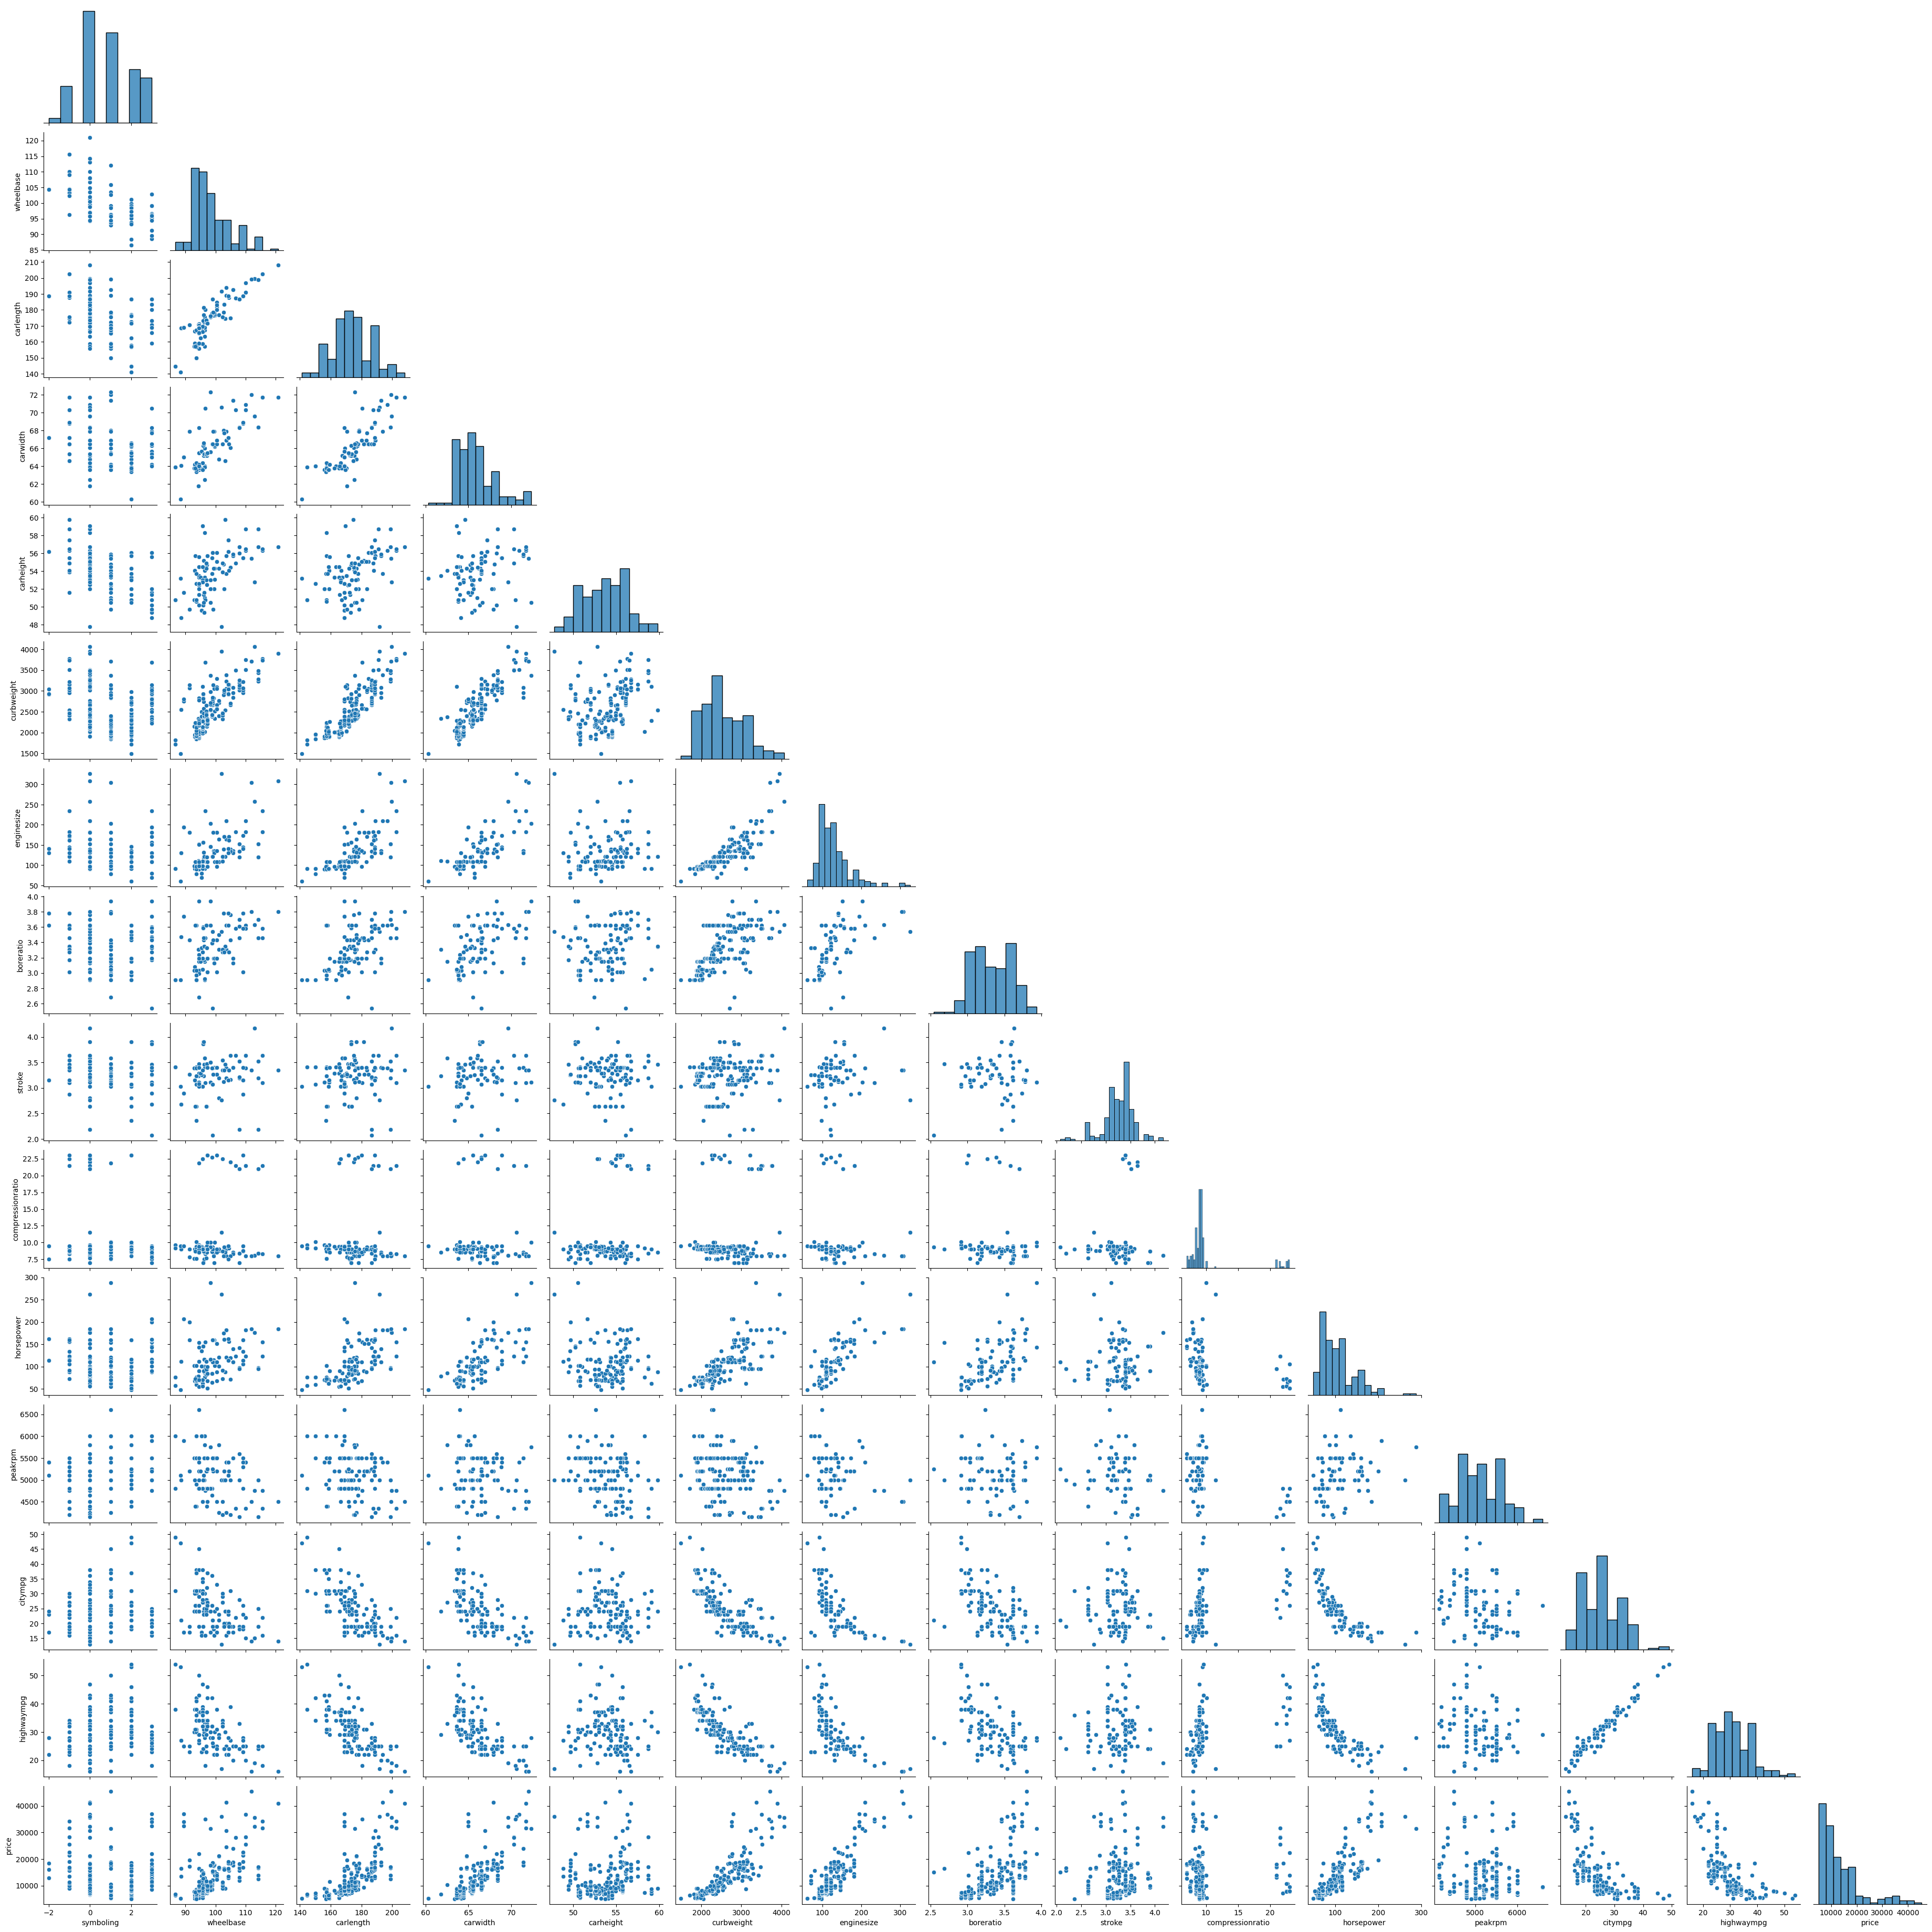

In [9]:
# Create the default pairplot
sns.pairplot(car, corner = True)

In [10]:
car.corr()

<ipython-input-10-3553584bfafd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car.corr()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


<ipython-input-120-0c2e9b6590ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = car.corr()


<Axes: >

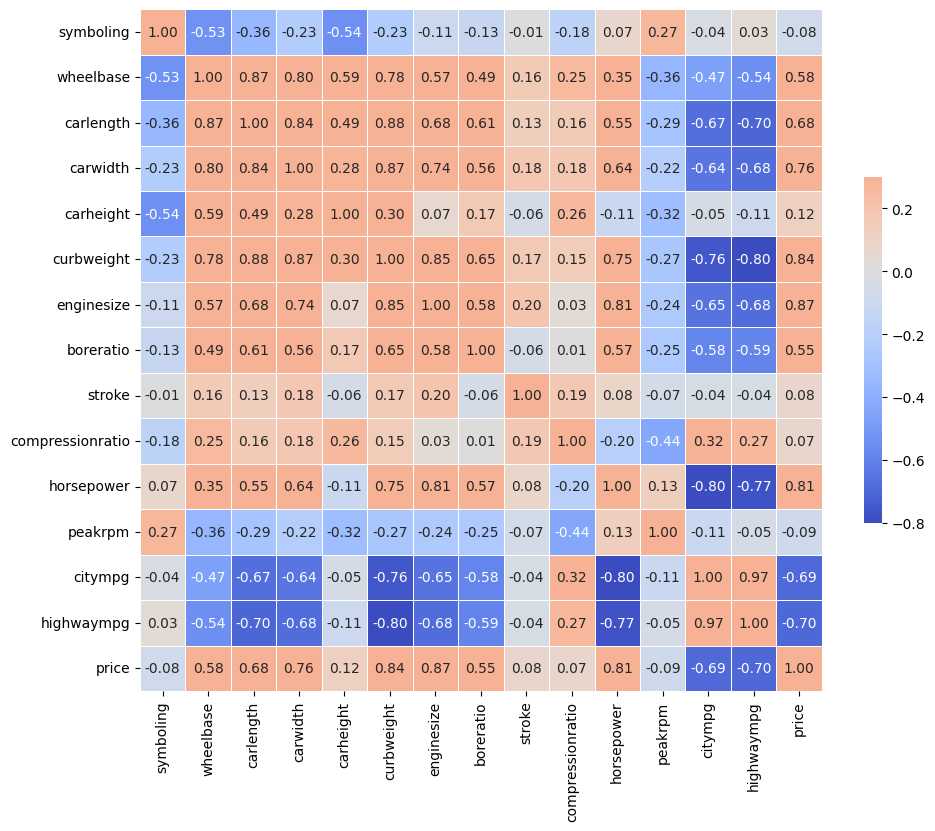

In [120]:
corr = car.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")



In [12]:
car['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

Text(0, 0.5, 'Count')

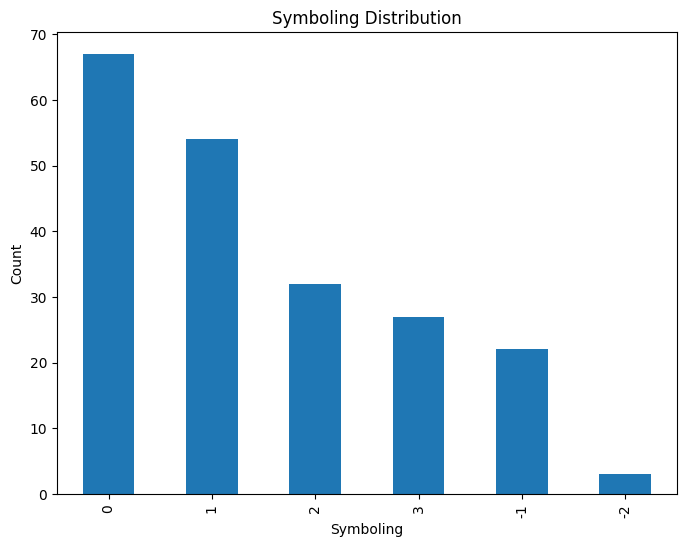

In [13]:
plt.figure(figsize=(8,6))
car['symboling'].value_counts().plot(kind='bar')
plt.title('Symboling Distribution')
plt.xlabel('Symboling')
plt.ylabel('Count')


In [14]:
# Group the data by 'symboling' and calculate the mean of 'price' for each group
symboling_price = car.groupby('symboling')['price'].mean()

# Print the result
print(symboling_price)

symboling
-2    15781.666667
-1    17330.681818
 0    14366.965179
 1    10037.907407
 2    10109.281250
 3    17221.296296
Name: price, dtype: float64


Cars with a symboling of -2 have an average price of approximately 15781.67
Cars with a symboling of -1 have an average price of approximately 17330.68
Cars with a symboling of 0 have an average price of approximately 14366.97
Cars with a symboling of 1 have an average price of approximately 10037.91
Cars with a symboling of 2 have an average price of approximately 10109.28
Cars with a symboling of 3 have an average price of approximately 17221.30

From these results, it seems that the symboling of a car could be a significant factor in predicting its price, as the average prices vary quite a bit across different symboling values.

Text(0, 0.5, 'Average Price')

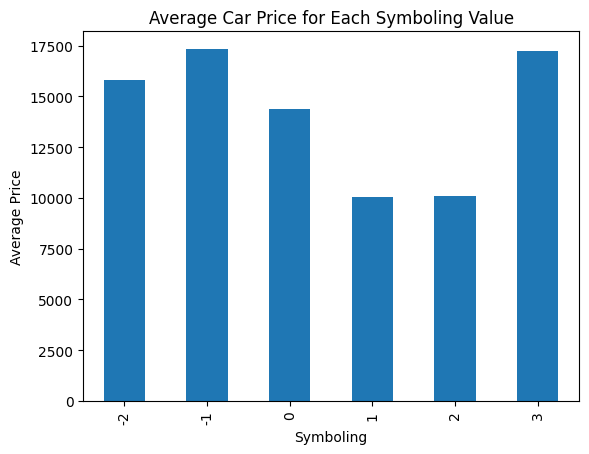

In [15]:
symboling_price.plot(kind='bar')
plt.title('Average Car Price for Each Symboling Value')
plt.xlabel('Symboling')
plt.ylabel('Average Price')

In [16]:
car['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [122]:
car['CarName'].str.split(' ').str.get(0).nunique()

28

In [124]:
car['company']=car['CarName'].str.split(' ').str.get(0)

In [125]:
car.loc[car['company']=='vw','company']='volkswagen'
car.loc[car['company']=='porcshce','company']='porsche'
car.loc[car['company']=='nissan','company']='Nissan'
car.loc[car['company']=='maxda','company']='mazda'
car.loc[car['company']=='toyouta','company']='toyota'
car.loc[car['company']=='vokswagen','company']='volkswagen'

In [126]:
car['company'].value_counts()

toyota         32
Nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: company, dtype: int64

In [128]:
car['company'].nunique()

22

In [129]:
car.drop('CarName',axis=1,inplace=True)

In [130]:
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [132]:
car['company'].value_counts(normalize=True)*100

toyota         15.609756
Nissan          8.780488
mazda           8.292683
mitsubishi      6.341463
honda           6.341463
volkswagen      5.853659
subaru          5.853659
peugeot         5.365854
volvo           5.365854
dodge           4.390244
buick           3.902439
bmw             3.902439
audi            3.414634
plymouth        3.414634
saab            2.926829
porsche         2.439024
isuzu           1.951220
jaguar          1.463415
chevrolet       1.463415
alfa-romero     1.463415
renault         0.975610
mercury         0.487805
Name: company, dtype: float64

In [133]:
#Missing Values:

car.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
company             0
dtype: int64

# Separating categorical and Numerical columns for further analysis:

In [134]:
car_cat_col = [car.dtypes.index[i] for i in range (len(car.dtypes)) if car.dtypes[i] == 'object']
car_cat_col

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company']

In [135]:
car_num_col = [i for i in car.columns if i  not in car_cat_col ]
car_num_col

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [136]:
for i in car_cat_col:
  if i!='company':
    print('\n',car[i].value_counts(normalize=True)*100)
  else:
    pass


 gas       90.243902
diesel     9.756098
Name: fueltype, dtype: float64

 std      81.95122
turbo    18.04878
Name: aspiration, dtype: float64

 four    56.097561
two     43.902439
Name: doornumber, dtype: float64

 sedan          46.829268
hatchback      34.146341
wagon          12.195122
hardtop         3.902439
convertible     2.926829
Name: carbody, dtype: float64

 fwd    58.536585
rwd    37.073171
4wd     4.390244
Name: drivewheel, dtype: float64

 front    98.536585
rear      1.463415
Name: enginelocation, dtype: float64

 ohc      72.195122
ohcf      7.317073
ohcv      6.341463
dohc      5.853659
l         5.853659
rotor     1.951220
dohcv     0.487805
Name: enginetype, dtype: float64

 four      77.560976
six       11.707317
five       5.365854
eight      2.439024
two        1.951220
three      0.487805
twelve     0.487805
Name: cylindernumber, dtype: float64

 mpfi    45.853659
2bbl    32.195122
idi      9.756098
1bbl     5.365854
spdi     4.390244
4bbl     1.463415
mfi     

# Univariate Analysis

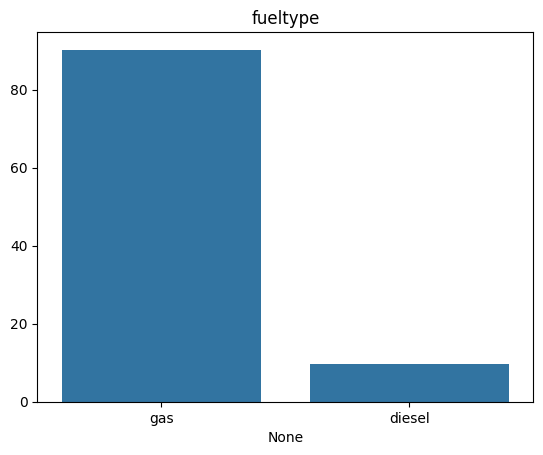

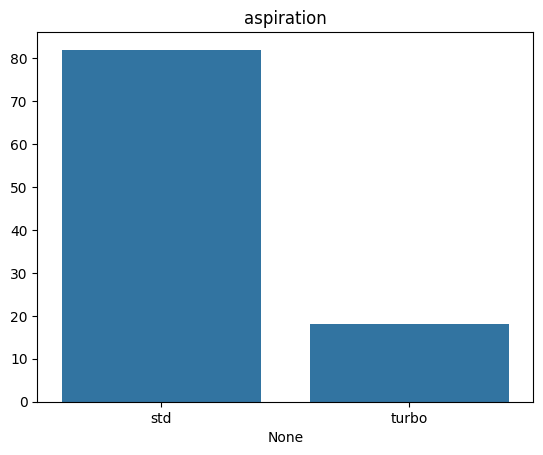

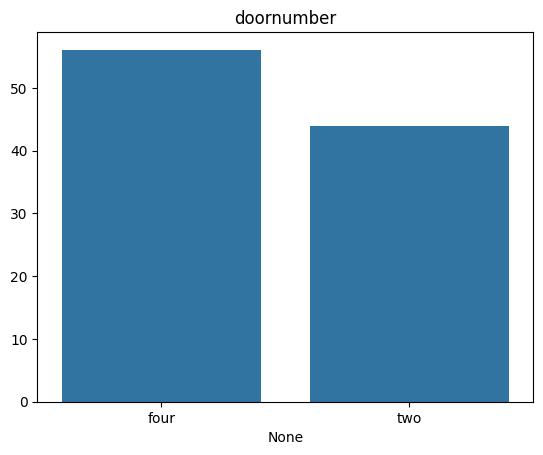

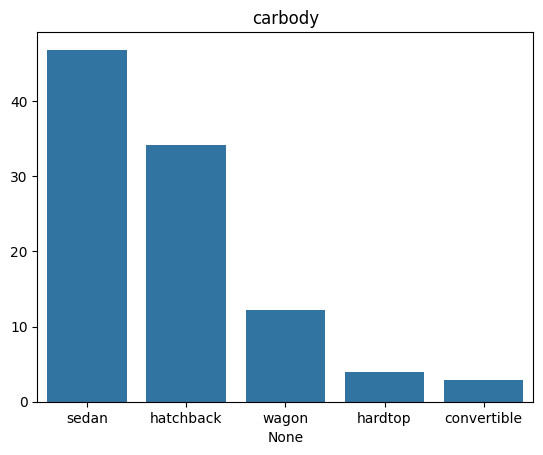

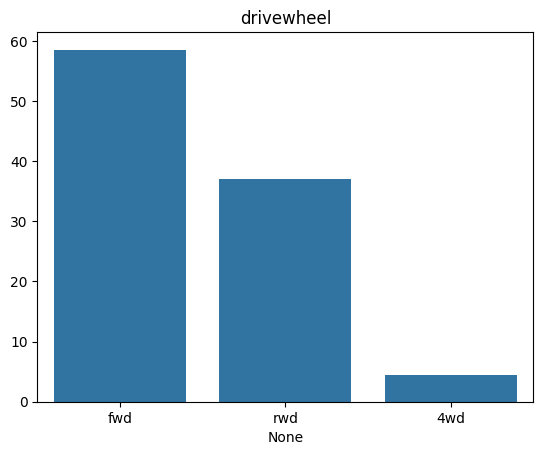

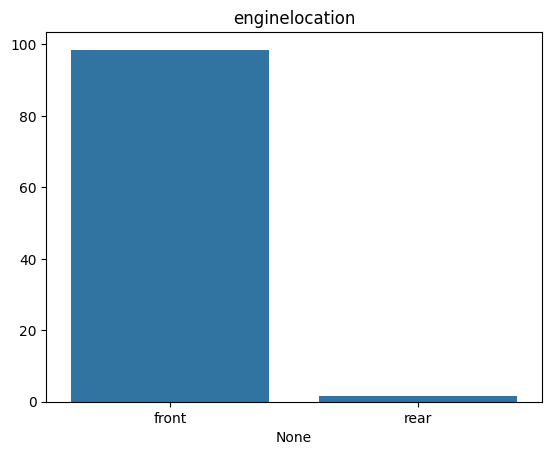

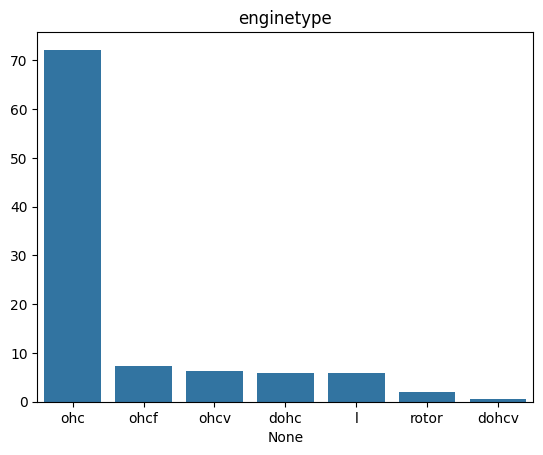

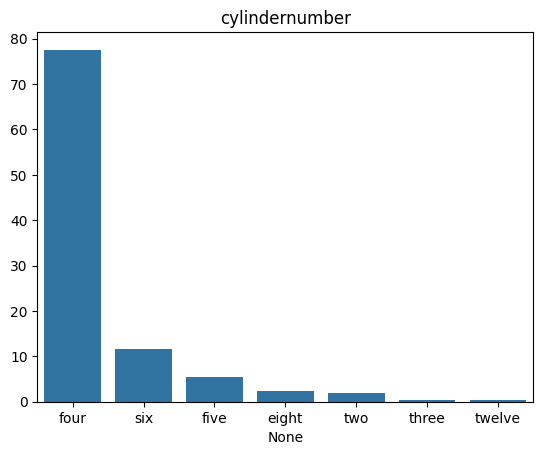

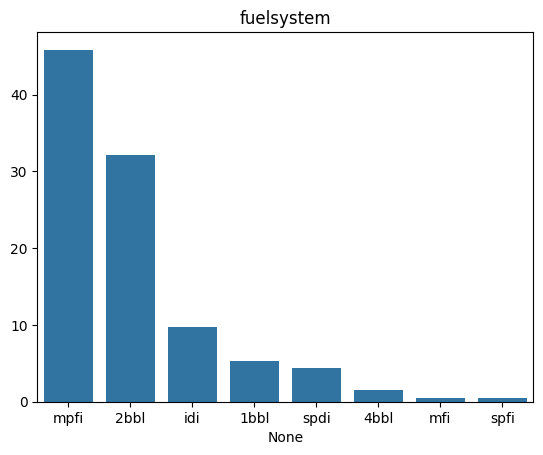

In [137]:
for i in car_cat_col:
  if i!='company':
    fig,ax=plt.subplots()
    plt.title(i)
    sns.barplot(x=car[i].value_counts().index,y=(car[i].value_counts(normalize=True)*100).values)

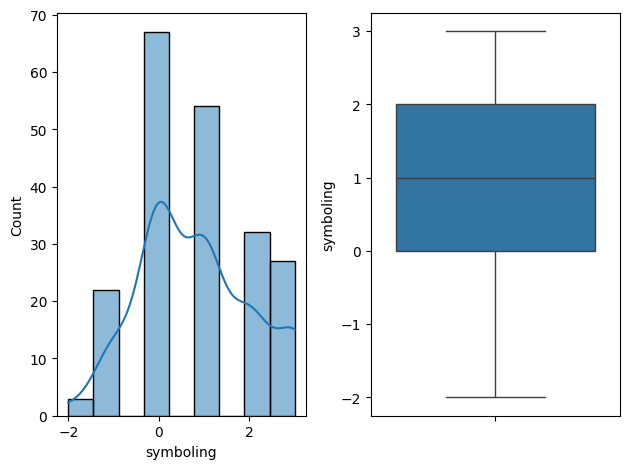

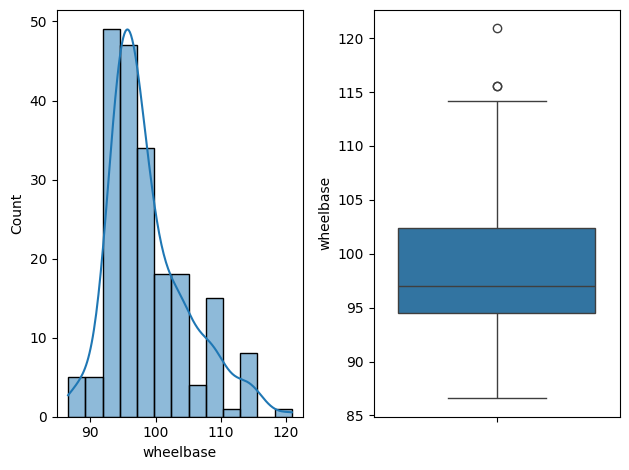

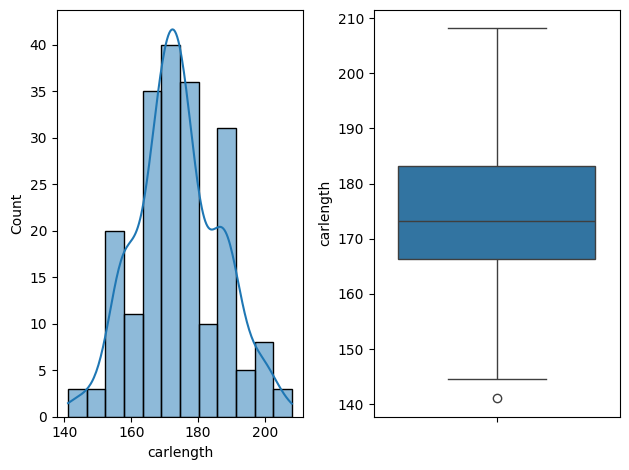

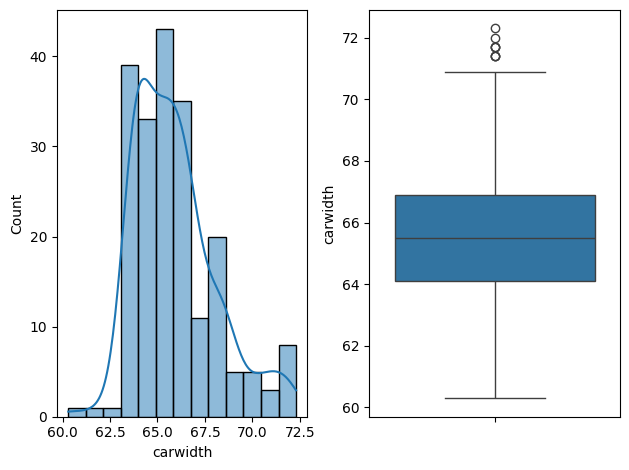

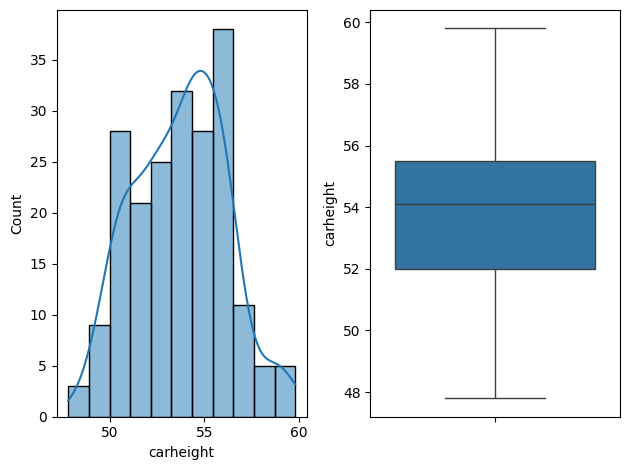

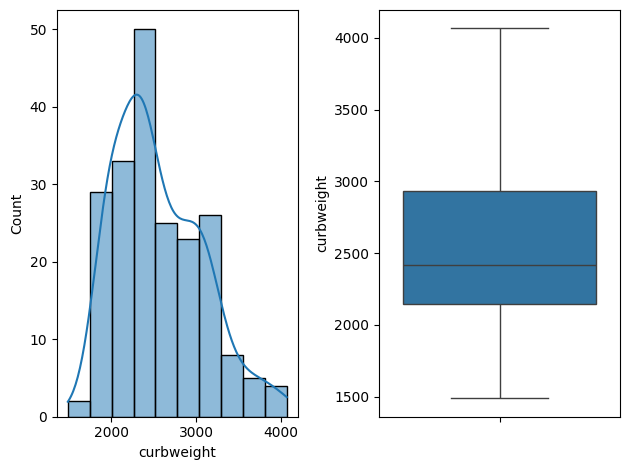

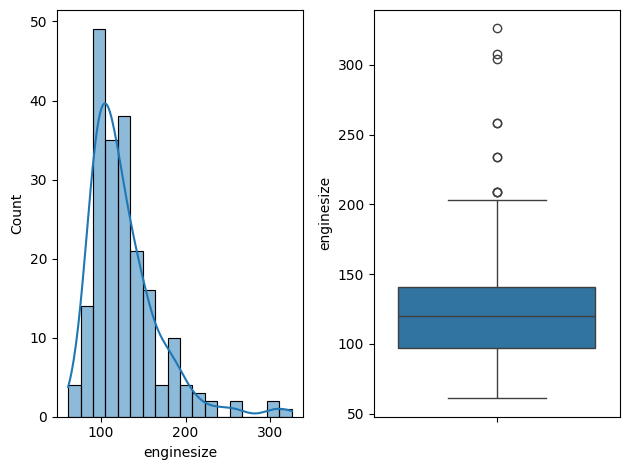

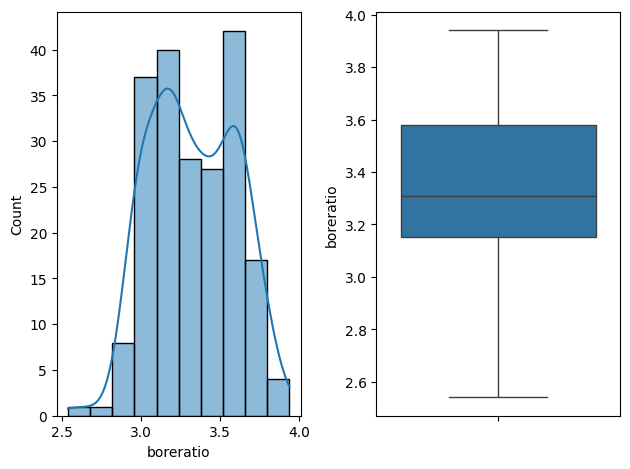

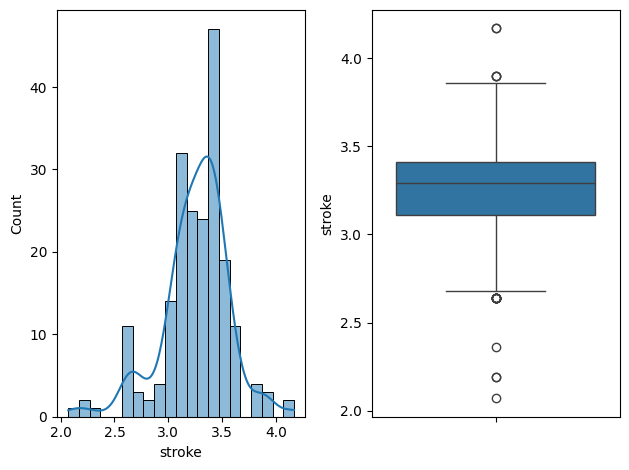

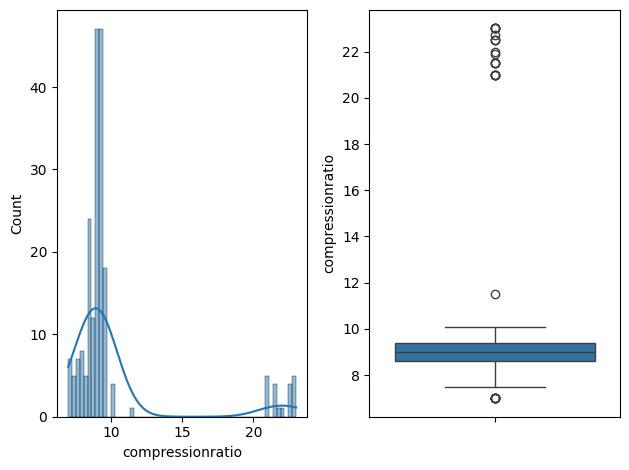

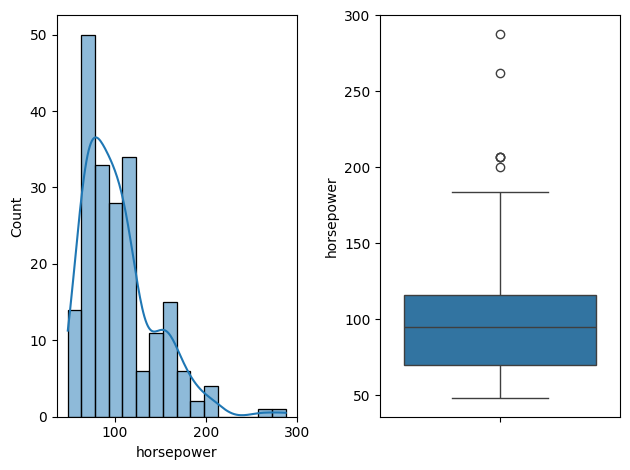

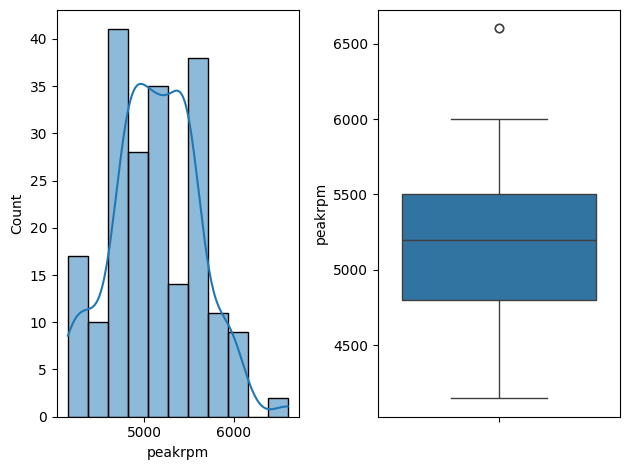

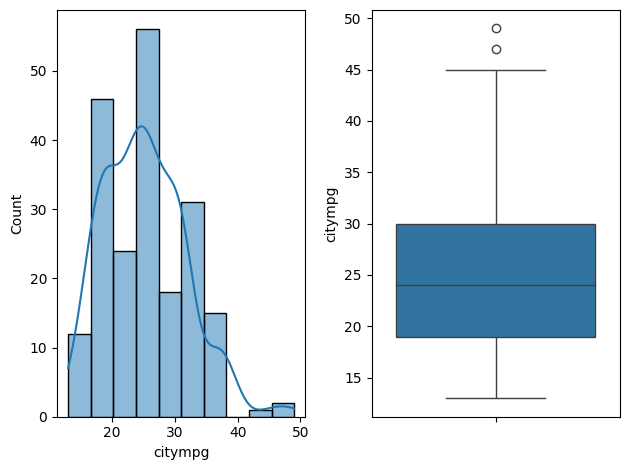

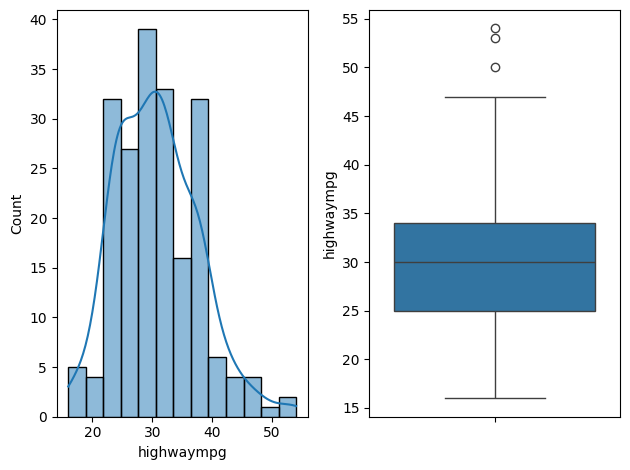

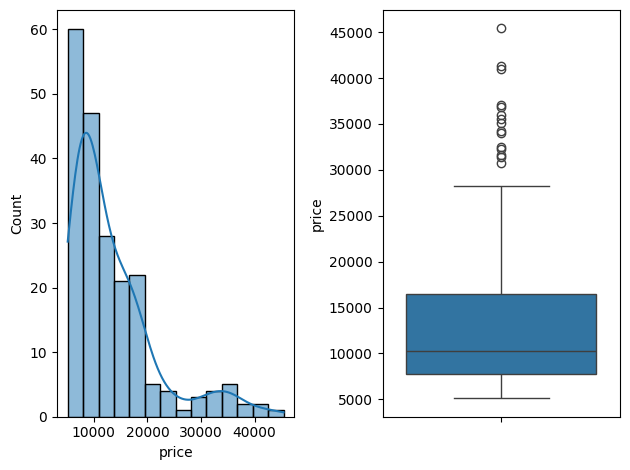

In [138]:
for col in car_num_col:
  plt.subplot(1,2,1)
  sns.histplot(car[col],kde=True)
  plt.subplot(1,2,2)
  sns.boxplot(car[col])
  plt.tight_layout()
  plt.show()

In [141]:
#Checking for outliers in compression ratio
car[car['compressionratio']>15]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
63,0,diesel,std,four,sedan,fwd,front,98.8,177.8,66.5,...,idi,3.39,3.39,22.7,64,4650,36,42,10795.0,mazda
66,0,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,...,idi,3.43,3.64,22.0,72,4200,31,39,18344.0,mazda
67,-1,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,...,idi,3.58,3.64,21.5,123,4350,22,25,25552.0,buick
68,-1,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,...,idi,3.58,3.64,21.5,123,4350,22,25,28248.0,buick
69,0,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,idi,3.58,3.64,21.5,123,4350,22,25,28176.0,buick
70,-1,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,idi,3.58,3.64,21.5,123,4350,22,25,31600.0,buick
90,1,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,...,idi,2.99,3.47,21.9,55,4800,45,50,7099.0,Nissan
108,0,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,...,idi,3.70,3.52,21.0,95,4150,28,33,13200.0,peugeot
110,0,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,...,idi,3.70,3.52,21.0,95,4150,25,25,13860.0,peugeot
112,0,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,...,idi,3.70,3.52,21.0,95,4150,28,33,16900.0,peugeot


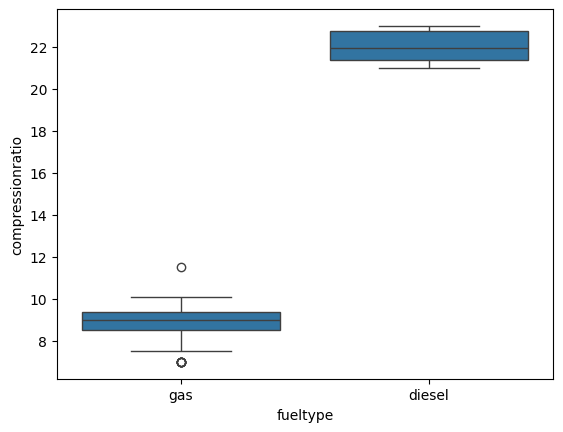

In [142]:
sns.boxplot(x='fueltype',y='compressionratio',data=car);

Checking for outliers in enginesize feature

In [143]:
car['enginesize'].quantile([0.95,0.96,0.97,0.98,0.99,1])

0.95    201.20
0.96    209.00
0.97    231.00
0.98    256.08
0.99    302.16
1.00    326.00
Name: enginesize, dtype: float64

In [144]:
car[car['enginesize']>250]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
47,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0,jaguar
48,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0,jaguar
49,0,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,...,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar
73,0,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,buick
74,1,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,...,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,buick


checking for outliers in price feature

In [146]:
car['price'].quantile([0.95,0.96,0.97,0.98,0.99])

0.95    32472.40
0.96    34159.04
0.97    35490.72
0.98    36809.60
0.99    40802.72
Name: price, dtype: float64

In [147]:
car[car['price']>30000]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
15,0,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,...,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0,bmw
16,0,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,bmw
17,0,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,...,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0,bmw
47,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0,jaguar
48,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0,jaguar
49,0,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,...,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar
70,-1,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,idi,3.58,3.64,21.5,123,4350,22,25,31600.0,buick
71,-1,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,...,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0,buick
72,3,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,...,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0,buick
73,0,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,buick


# Bivariate Analysis

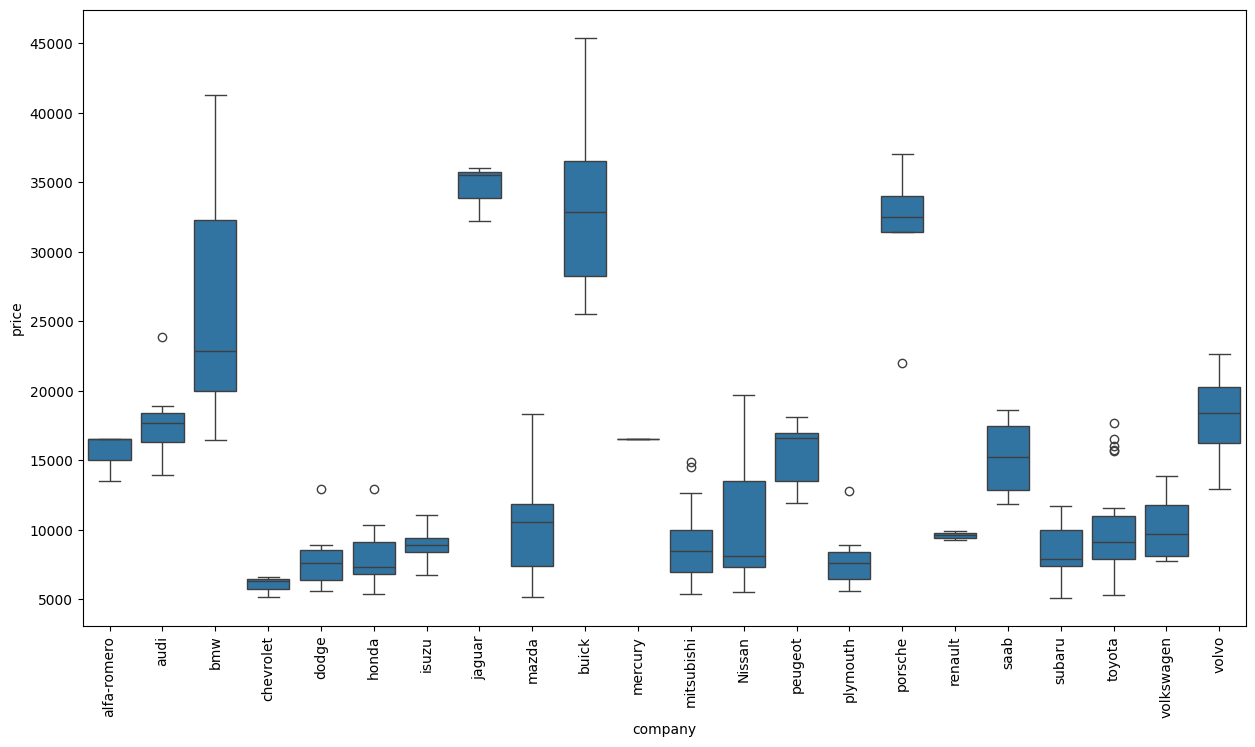

In [148]:
plt.figure(figsize=(15,8))
sns.boxplot(x='company',y='price',data=car);
plt.xticks(rotation='vertical');

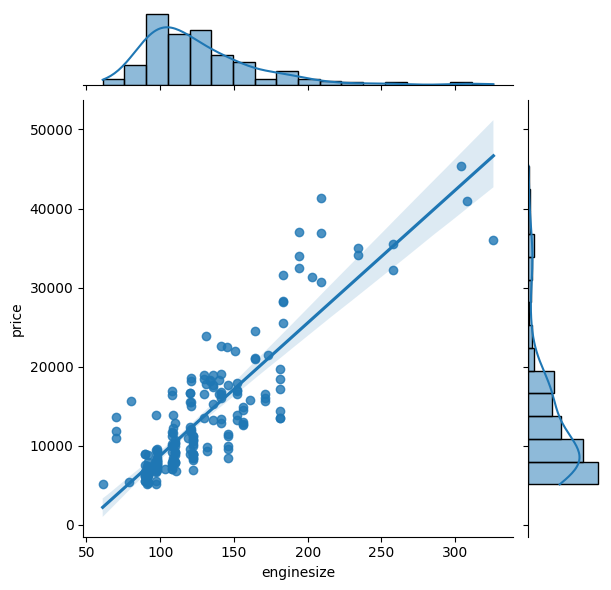

In [149]:
sns.jointplot(x='enginesize',y='price',data=car,kind='reg');

In [151]:
np.round(car['enginesize'].corr(car['price']),2)

0.87

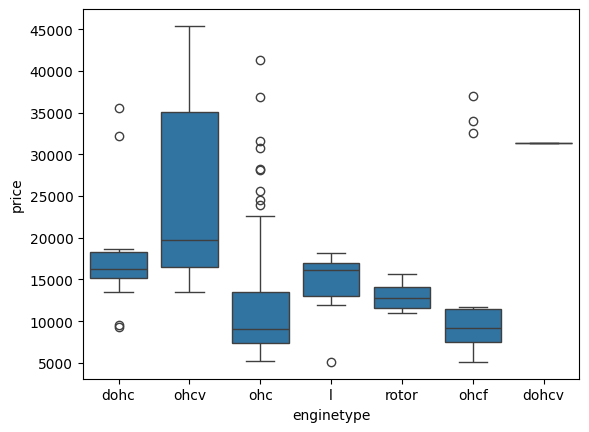

In [152]:
sns.boxplot(x='enginetype',y='price',data=car);

In [153]:
car['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

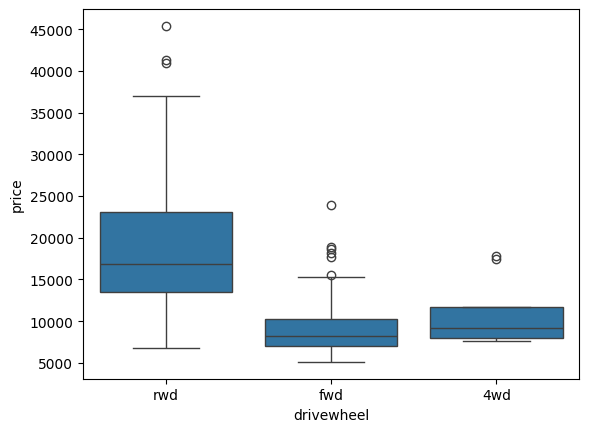

In [154]:
sns.boxplot(x='drivewheel',y='price',data=car);

# MULTIVARAITE ANALYSIS

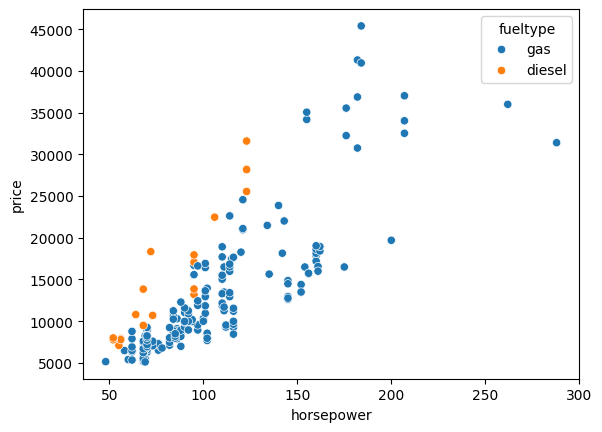

In [155]:
sns.scatterplot(x='horsepower',y='price',hue='fueltype',data=car);

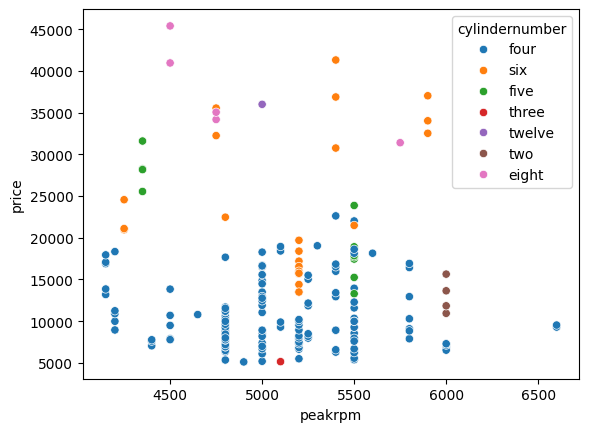

In [156]:
sns.scatterplot(x='peakrpm',y='price',hue='cylindernumber',data=car);

<ipython-input-157-ce4559c1afe3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car.corr(),cmap='BuPu',annot=True);


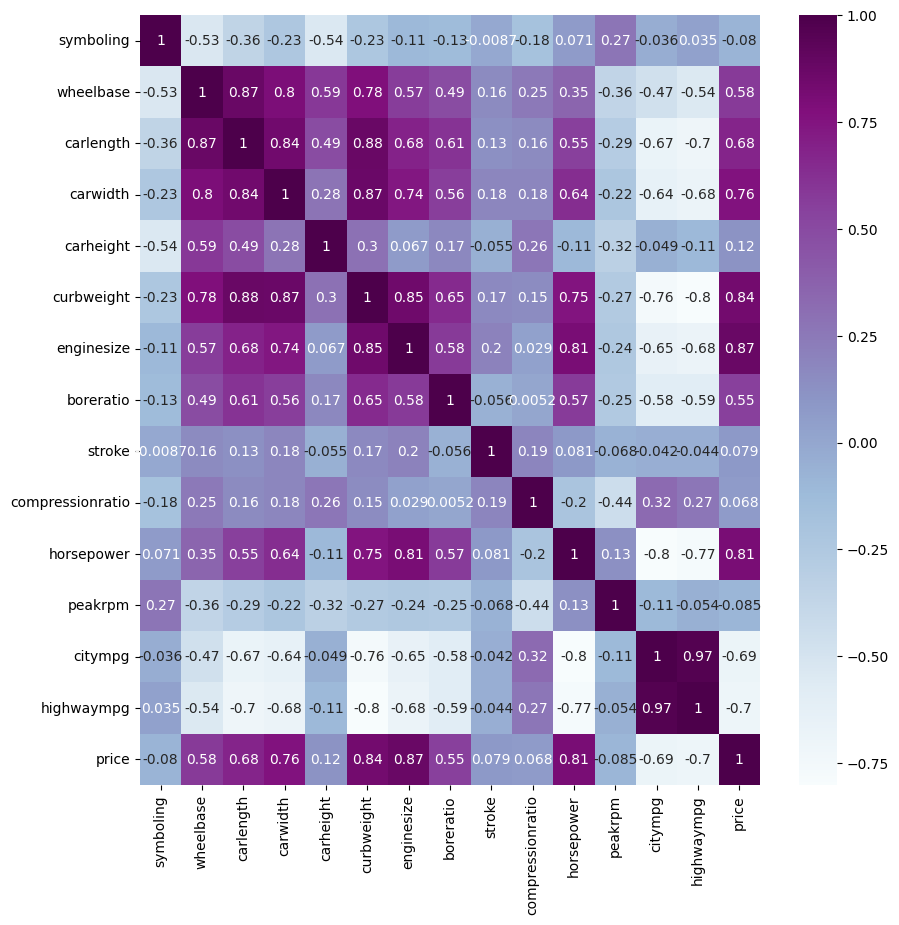

In [157]:
plt.figure(figsize=(10,10))
sns.heatmap(car.corr(),cmap='BuPu',annot=True);

In [159]:
car.drop('highwaympg',axis=1,inplace=True)

<ipython-input-162-b50cbc8f9419>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car.corr(),cmap='rocket',annot=True);


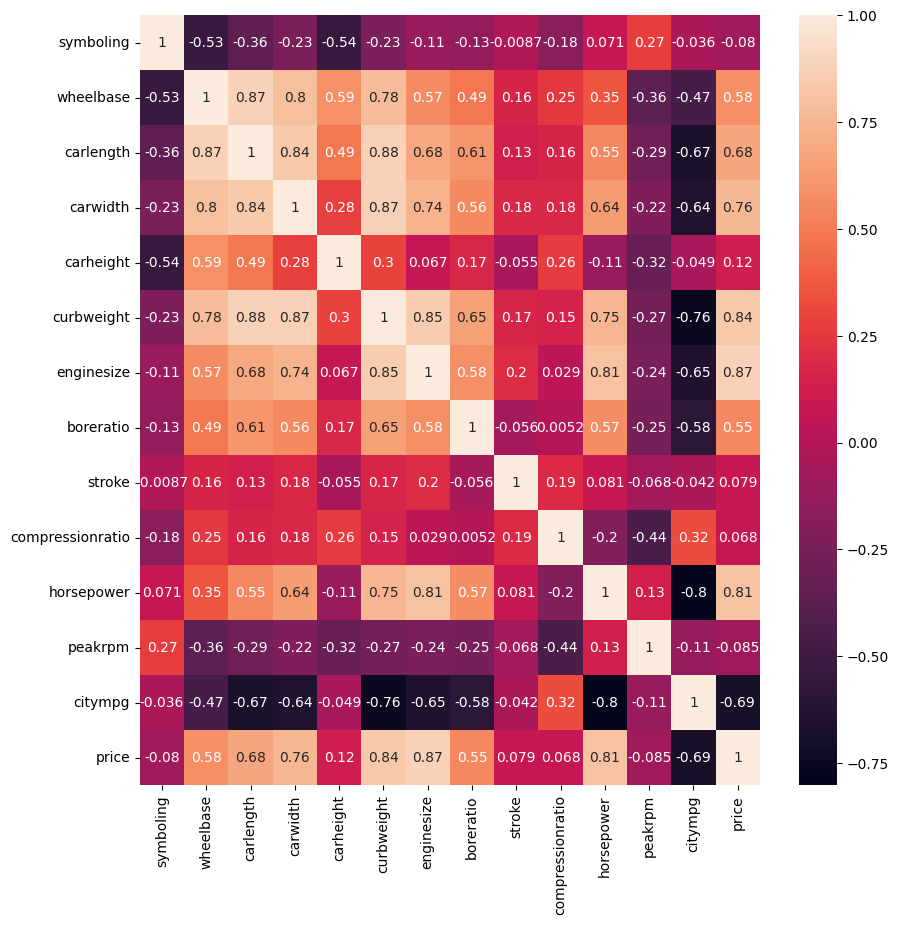

In [162]:
plt.figure(figsize=(10,10))
sns.heatmap(car.corr(),cmap='rocket',annot=True);

In [165]:
plt.figure(figsize=(15,8))
sns.lineplot(x=corr.index,y=corr.values,color='black');
plt.xticks(rotation='vertical');

ValueError: Per-column arrays must each be 1-dimensional

<Figure size 1500x800 with 0 Axes>

In [166]:
car.drop('wheelbase',axis=1,inplace=True)

In [168]:
corr=car.corr()['price'].sort_values(ascending=False)[1:]
corr

<ipython-input-168-5ad610f086d8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=car.corr()['price'].sort_values(ascending=False)[1:]


enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
Name: price, dtype: float64

# Data Preprocessing

In [169]:
cat_df=car[car_cat_col]

In [170]:
dummies=pd.get_dummies(cat_df,drop_first=True)

In [171]:
car_1=car.drop(list(cat_df.columns),axis=1)

In [172]:
car_2=pd.concat([car_1,dummies],axis=1)

In [173]:
car_2.columns

Index(['symboling', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'price', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'company_alfa-romero',
       'company_audi', 'company_bmw', 'company_buick', 'company_chevrolet',
       'company_dodge', 'company_honda', 'company_isuzu', 'company_jaguar',
     

In [ ]:
from sklearn.model_selection import train_test_split

In [174]:
#VIF to check multi-colinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = car_2.drop('price', axis=1)

# Calculate VIF for each independent variable
vif = pd.DataFrame()

vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


              features        VIF
0            symboling   6.127855
1            carlength  20.493776
2             carwidth  13.843268
3            carheight   6.125301
4           curbweight  49.295746
..                 ...        ...
57        company_saab   4.268396
58      company_subaru        inf
59      company_toyota   4.792314
60  company_volkswagen   3.454815
61       company_volvo   6.095117

[62 rows x 2 columns]


# Splitting the Data

In [189]:
X=car_2.drop('price',axis=1)
y=car_2['price']



X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)


# Feature Scaling

In [190]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Building

In [191]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

# Model Evaluation

In [192]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 5271345.142383693
R^2 Score: 0.9126836008620958


# Decision Tree Regressor Model:

In [193]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor object
dt = DecisionTreeRegressor()

# Train the model using the training sets
dt.fit(X_train_scaled, y_train)

# Make predictions using the testing set
y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Regressor:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_dt)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_dt)}")



Decision Tree Regressor:
Mean Squared Error: 6875279.661290322
R^2 Score: 0.8861154701741888


# Random Forest Regressor Model:

In [194]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Train the model using the training sets
rf.fit(X_train_scaled, y_train)

# Make predictions using the testing set
y_pred_rf = rf.predict(X_test_scaled)

# Print the predictions
print("Random Forest Regressor:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf)}")



Random Forest Regressor:
Mean Squared Error: 4190110.742699985
R^2 Score: 0.9305935445015903
